# Preamble

Let's see if we can translate a book that is in Japanese into English.

* `https://pypi.org/project/pdf2image/`
    * `mamba install pdf2image`
    * `mamba install pytesseract    `
* `brew install tesseract`
* `https://pyimagesearch.com/2020/08/03/tesseract-ocr-for-non-english-languages/`
    * `git clone https://github.com/tesseract-ocr/tessdata`
    * `export TESSDATA_PREFIX=/Users/KS/git/tessdata`

In [1]:
from pathlib import Path
from PIL import Image

from pdf2image import convert_from_path, convert_from_bytes
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)

from matplotlib.pyplot import imshow
import numpy as np

%matplotlib inline

In [2]:
input_basepath = Path('./data/book_0/')
input_filepath = input_basepath/'Dawn_Of_Independent_India-Ras_Bihari_Bose.pdf'

In [3]:
output_basepath = Path('./output/')

In [4]:
!mkdir -p {output_basepath}

# Extract pages

Extract each page from the pdf as a separate jpeg

In [5]:
output_path_0 = output_basepath/'0_images'

In [6]:
!mkdir -p {output_path_0}

In [7]:
dpi = 220
images_0 = convert_from_path(input_filepath, 
                             dpi=dpi, #200 default 
                             output_folder=output_path_0, 
                             # first_page=None, 
                             # last_page=None, 
                             fmt='jpeg', 
                             # jpegopt=None, 
                             thread_count=1, 
                             # userpw=None, 
                             use_cropbox=True, 
                             # strict=False, 
                             # transparent=False, 
                             # single_file=False, 
                             output_file='doii-rsb-', 
                             # poppler_path=None, 
                             # grayscale=False, 
                             # size=None, 
                             # paths_only=False, 
                             # use_pdftocairo=False, 
                             # timeout=600, 
                             # hide_attributes=False
                            )

`pdf2image` nicely numbers each image with 001, 002 and so on.

In [8]:
sorted(output_path_0.glob('**/*.jpg'))[:2]

[PosixPath('output/0_images/doii-rsb-0001-001.jpg'),
 PosixPath('output/0_images/doii-rsb-0001-002.jpg')]

In [9]:
sorted(output_path_0.glob('**/*.jpg'))[-1]

PosixPath('output/0_images/doii-rsb-0001-154.jpg')

So there are 154 images for us to play with.

## Examine an image

Let's examine the 100-th page in the book

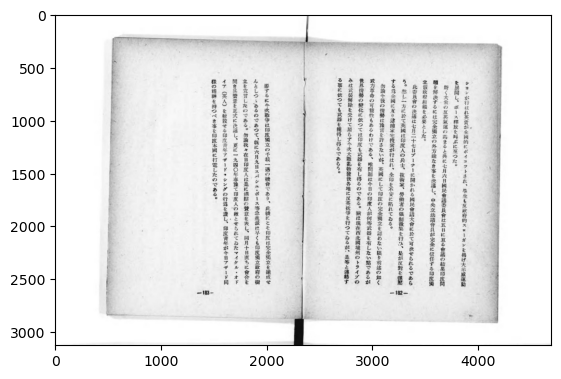

In [10]:
pil_im = Image.open(sorted(output_path_0.glob('**/*.jpg'))[99])
imshow(np.asarray(pil_im))

* We see that each image actually consists of two pages.
* The page numbering indicates that the page on the right is page 182 while that on the left is page 183
    * So the page on the right is to be read first and then the page that is on the right.
* Also each page is to be read starting with the column of text in the extreme left column (going top to bottom) and then moving column by column to the right.

In [11]:
from utilities import helper

# Split image

Split each image so that we get one image for the left page and one for the right.

In [12]:
left_page, right_page = helper.split_image(output_path_0/'doii-rsb-0001-100.jpg')

## Examine the right page of image 100

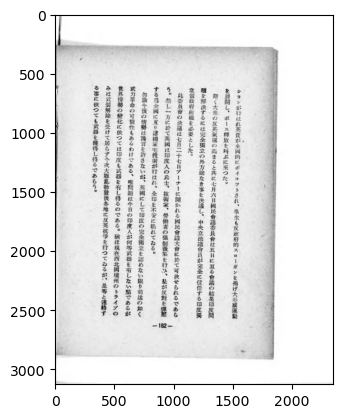

In [13]:
imshow(right_page)

In [14]:
output_path_1 = output_basepath/'1_left_right'

In [15]:
!mkdir -p {output_path_1}

In [16]:
helper.split_left_right(output_path_0,
                        output_path_1,
                       )

Done!


# Extract the text from each page

In [17]:
output_path_2 = output_basepath/'2_text'

In [18]:
!mkdir -p {output_path_2}

In [19]:
helper.extract_text(images_path=output_path_1, 
                    output_path=output_path_2,
                   )

Done!
